In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import r_regression

### import training data

In [19]:
with open('train.csv', 'r') as train_data:
    train_data = train_data.readlines()
    for i,d in enumerate(train_data):
        train_data[i] = train_data[i].split(",")

train_np = np.array(train_data[1:]).astype('float32')
labels = train_np[:,55:56]
train_np = train_np[0:,1:55]

### import test data

In [3]:
with open('test.csv', 'r') as test_data:
    test_data = test_data.readlines()
    for i,d in enumerate(test_data):
        test_data[i] = test_data[i].split(",")
    test_np = np.array(test_data[1:]).astype("float32")
    test_ids = test_np[0:,0:1]
    test_np = test_np[0:, 1:]

### Explore data

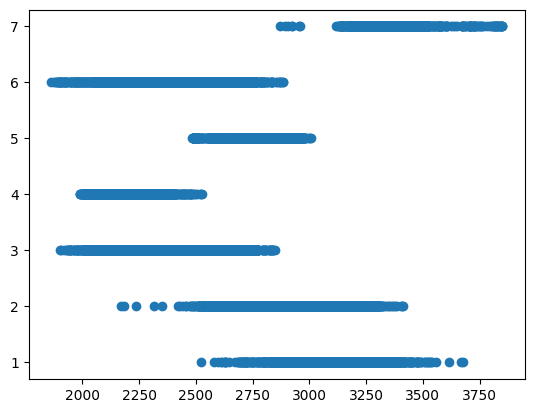

In [43]:
train_df = pd.read_csv('train.csv')
plt.scatter(train_df["Elevation"], train_df["Cover_Type"])

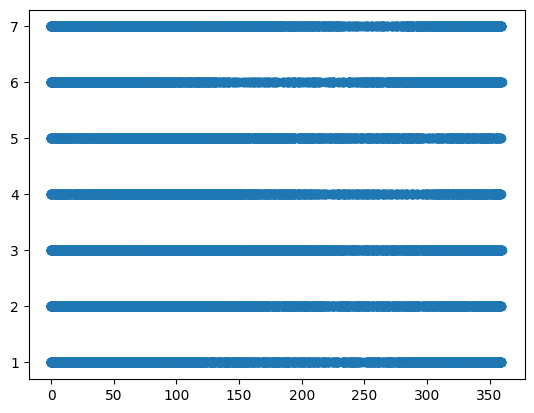

In [45]:
plt.scatter(train_df["Aspect"], train_df["Cover_Type"])

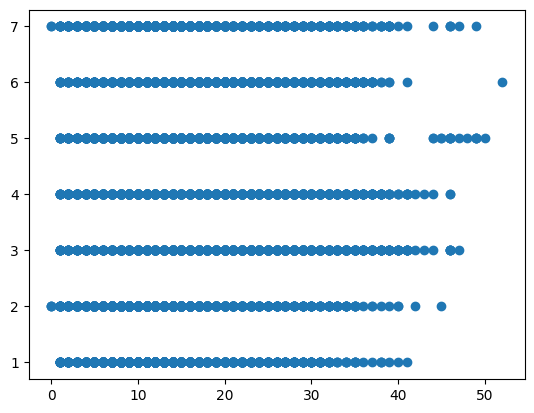

In [46]:
plt.scatter(train_df["Slope"], train_df["Cover_Type"])

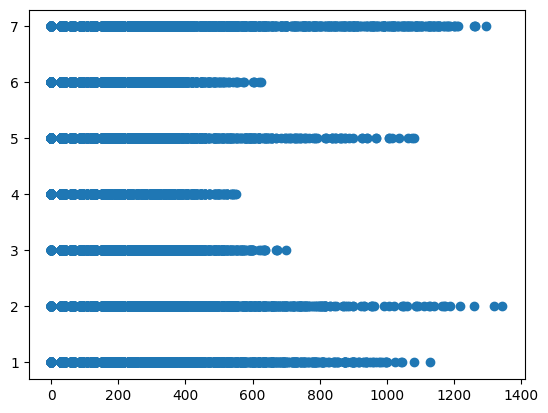

In [47]:
plt.scatter(train_df["Horizontal_Distance_To_Hydrology"], train_df["Cover_Type"])

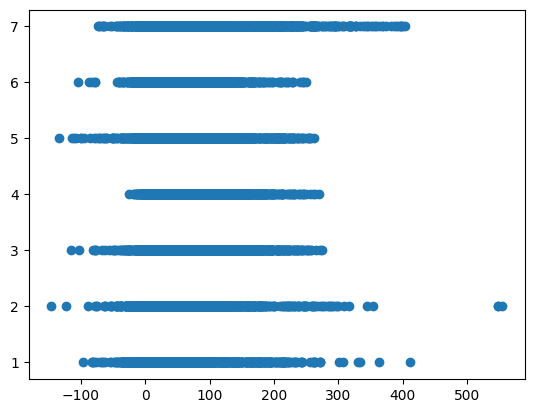

In [48]:
plt.scatter(train_df["Vertical_Distance_To_Hydrology"], train_df["Cover_Type"])

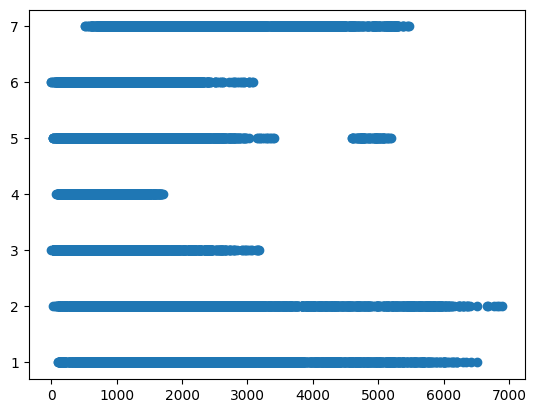

In [49]:
plt.scatter(train_df["Horizontal_Distance_To_Roadways"], train_df["Cover_Type"])

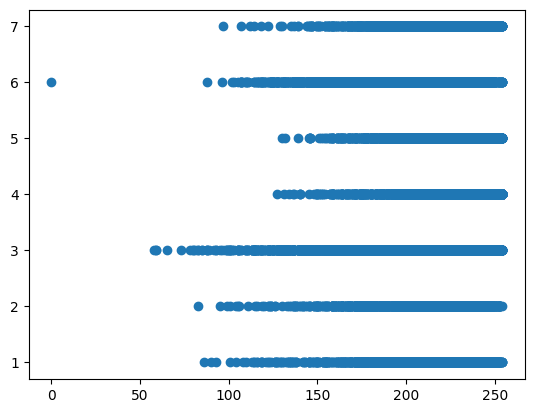

In [50]:
plt.scatter(train_df["Hillshade_9am"], train_df["Cover_Type"])

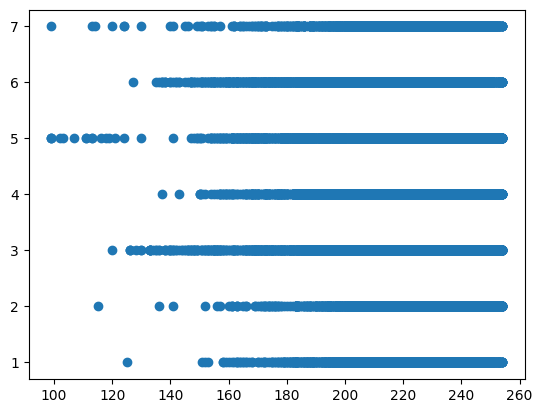

In [51]:
plt.scatter(train_df["Hillshade_Noon"], train_df["Cover_Type"])

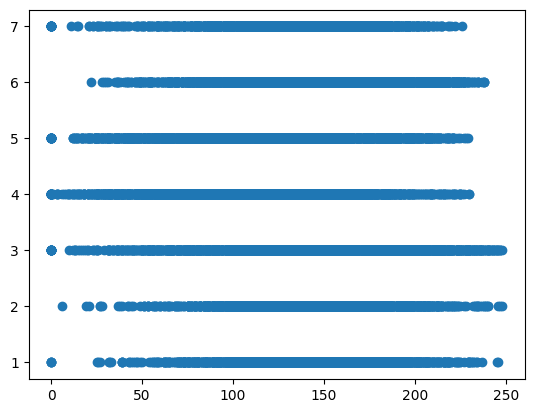

In [52]:
plt.scatter(train_df["Hillshade_3pm"], train_df["Cover_Type"])

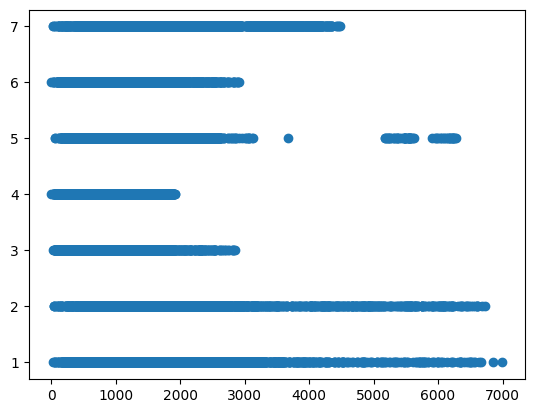

In [53]:
plt.scatter(train_df["Horizontal_Distance_To_Fire_Points"], train_df["Cover_Type"])

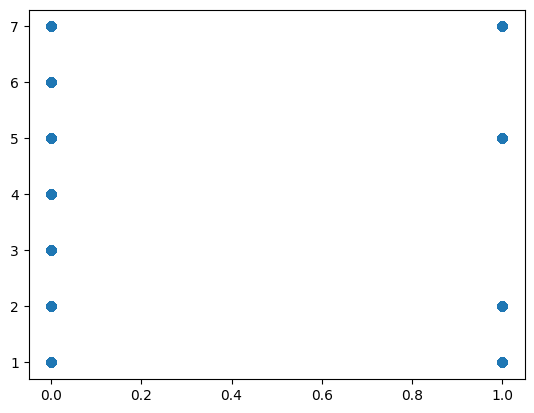

In [54]:
plt.scatter(train_df["Wilderness_Area1"], train_df["Cover_Type"])

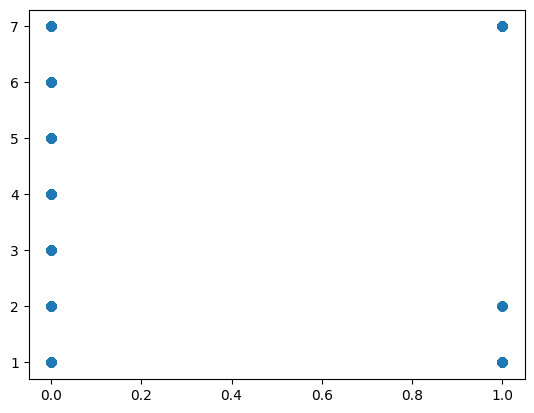

In [55]:
plt.scatter(train_df["Wilderness_Area2"], train_df["Cover_Type"])

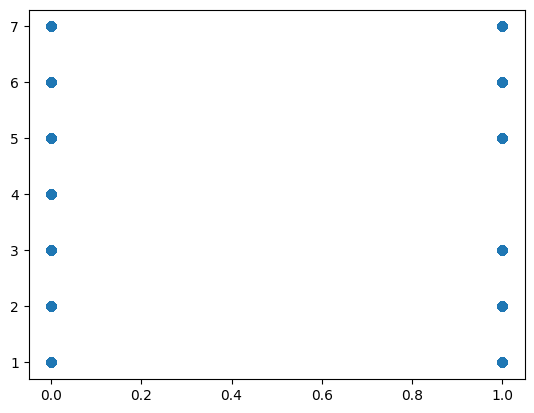

In [56]:
plt.scatter(train_df["Wilderness_Area3"], train_df["Cover_Type"])

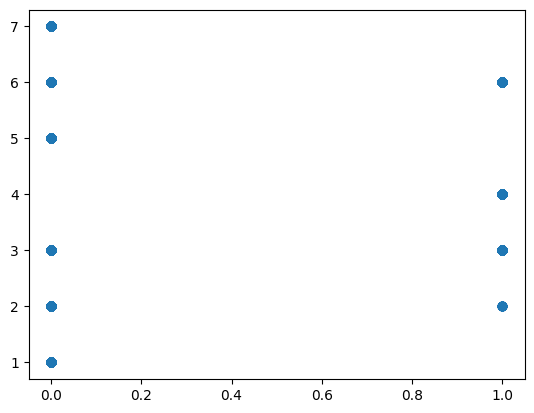

In [57]:
plt.scatter(train_df["Wilderness_Area4"], train_df["Cover_Type"])

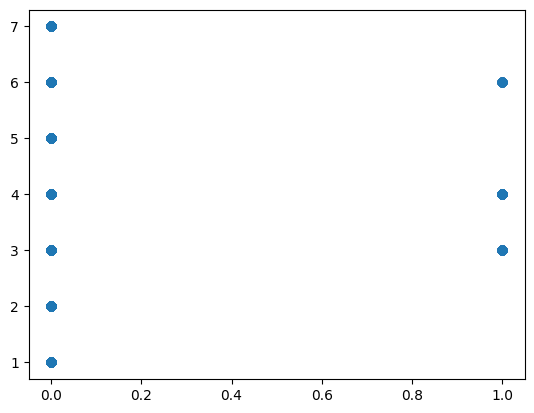

In [58]:
plt.scatter(train_df["Soil_Type1"], train_df["Cover_Type"])

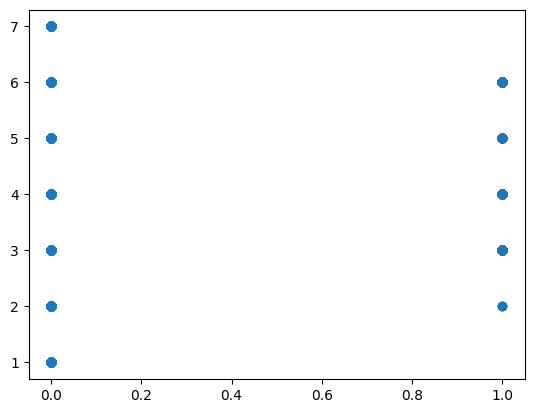

In [59]:
plt.scatter(train_df["Soil_Type2"], train_df["Cover_Type"])

### preprocessing

In [30]:
train_split = train_np[0:,0:10]
train_mean = np.mean(train_split, axis=0)
train_scaler = 1 / np.std(train_split - train_mean, axis=0)
train_split = (train_split - train_mean) * train_scaler
train_split = np.nan_to_num(train_split)
train_x = np.concatenate((train_split, train_np[0:,10:]), axis=1)


In [5]:
test_mean = np.mean(test_np, axis=0)
test_scaler = 1 / np.std(test_np - test_mean, axis=0)
test_x = (test_np - test_mean) * test_scaler
test_x = np.nan_to_num(test_x)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(train_x, labels, stratify=labels, test_size=0.3, random_state=25)

### svm

In [33]:
svm_model = SVC(kernel='rbf', gamma=0.1, C=100)
svm_model.fit(x_train, y_train.ravel())

SVC(C=100, gamma=0.1)

In [34]:
predictions = svm_model.predict(x_test)
errs = np.sum(predictions != y_test.flatten())

In [35]:
print(f"accuracy: {1 - (errs / len(y_test))}")

accuracy: 0.8313492063492063


In [36]:
submission_predictions = svm_model.predict(test_x)
svm_submission = pd.DataFrame()
svm_submission["Id"] = test_ids.flatten().astype('int')
svm_submission["Cover_Type"] = submission_predictions.astype('int')


In [37]:
# svm_submission.to_csv("svm_submission.csv", index=False)